<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
Open           100 non-null float64
High           100 non-null float64
Low            100 non-null float64
Last           100 non-null float64
Close          100 non-null float64
Total          100 non-null int64
Turnover       100 non-null float64
TurnoverVal    100 non-null int64
dtypes: float64(6), int64(2)
memory usage: 6.4 KB


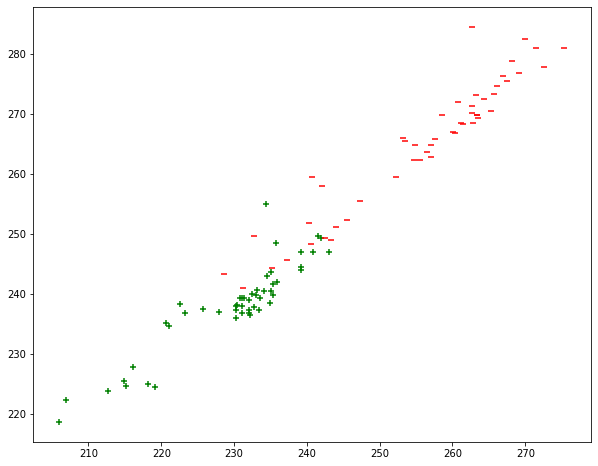

In [9]:
import pandas as pd

df = pd.read_csv('C:/Users/Shiv SJ/Desktop/Sem 6/CIP/Programs/stock4.csv')
df.head()
df.info()
target = df['TurnoverVal']
s = set()
for val in target:
    s.add(val)
s = list(s)
import matplotlib.pyplot as plt

x = df['Low']
y = df['High']

open_x = x[:50]
open_y = y[:50]

high_x = x[50:100]
high_y = y[50:100]

plt.figure(figsize=(10,8))
plt.scatter(open_x,open_y,marker='+',color='green')
plt.scatter(high_x,high_y,marker='_',color='red')
plt.show()


In [10]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
## Drop rest of the features and extract the target values
df = df.drop(['Low','High'],axis=1)
Y = []
target = df['TurnoverVal']
for val in target:
    if(val == 1):
        Y.append(-1)
    else:
        Y.append(1)
df = df.drop(['TurnoverVal'],axis=1)
X = df.values.tolist()


    
X, Y = shuffle(X,Y)
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

print(X[0])
from sklearn.metrics import accuracy_score

## Clip the weights 
index = list(range(10,90))
w1=0
w2=0
#w1 = np.delete(w1,index)
#w2 = np.delete(w2,index)

#w1 = w1.reshape(10,1)
#w2 = w2.reshape(10,1)
## Extract the test data features 
test_f1 = x_test[:,0]
test_f2 = x_test[:,1]

test_f1 = test_f1.reshape(10,1)
test_f2 = test_f2.reshape(10,1)
## Predict
y_pred = w1 * test_f1 + w2 * test_f2
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)



x=eval(input('Enter turnover value in lakhs'))
int(x)
if x>5000:
    print('Label is 1')
else:
    print('Label is 0')



[265.0, 258.3, 258.9, 3357333.0, 8804.57]
Enter turnover value in lakhs7644567
Label is 1


In [11]:
print(accuracy_score(y_test,predictions))

0.9
